# ENGR 509 Project

# Syed Amir Nadeem

1. Importing, Describing and Pre-Processing of Data Set

In [124]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [125]:
#import and print raw data file using Pandas
file = pd.read_csv('abalonedata.csv')
print(file)

     Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera Weight  Shell Weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [126]:
# some properties of our data set
file.describe()

#This function gives us vital information about the data set
#The values of all features are scaled very nicely

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [127]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [128]:
#checking if our data set has any 'NaN' values
file.isnull().values.any()

False

In [129]:
#adding class labels to our data set

#generating an empty list

random_list = []

#looping to add class labels to random list

for i in range(0,4177):
    if file.iloc[i]['Rings'] < 9:
        random_list.append(0)
    elif file.iloc[i]['Rings'] > 8 and file.iloc[i]['Rings'] < 13 :
        random_list.append(1)
    elif file.iloc[i]['Rings'] > 12:
        random_list.append(2)

#adding list to our data set

file["Class Label"] = random_list


print(file)

     Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera Weight  Shell Weight  Rings  Class Label  
0             0.1010        0.1500     15            2  
1             0.0485        0.0700      7            0  
2           

2. Visualization of Data

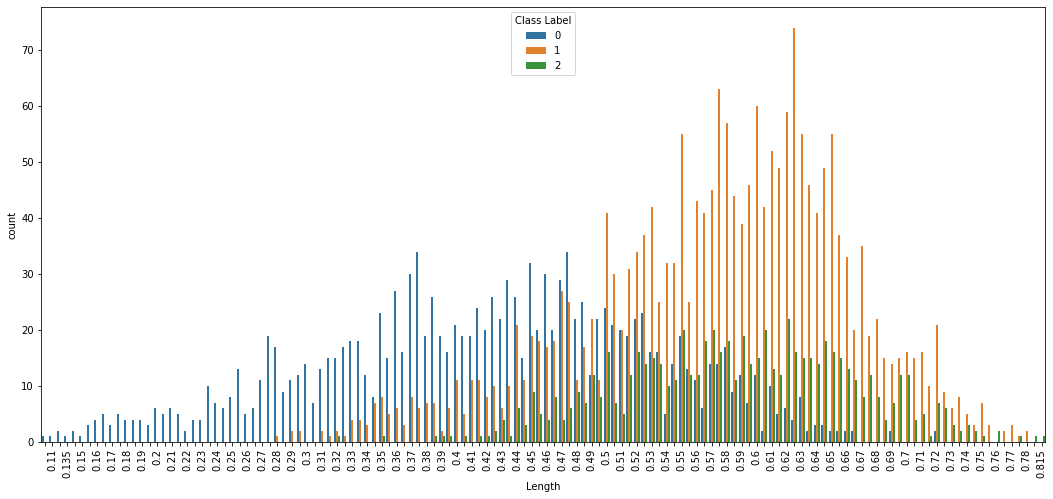

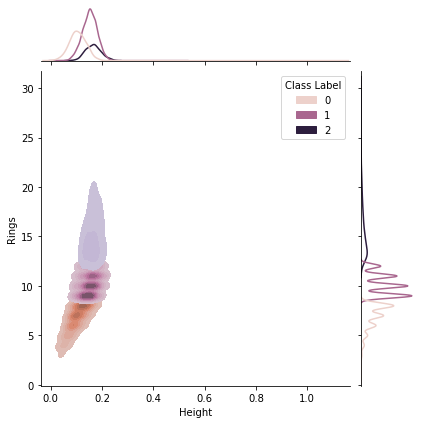

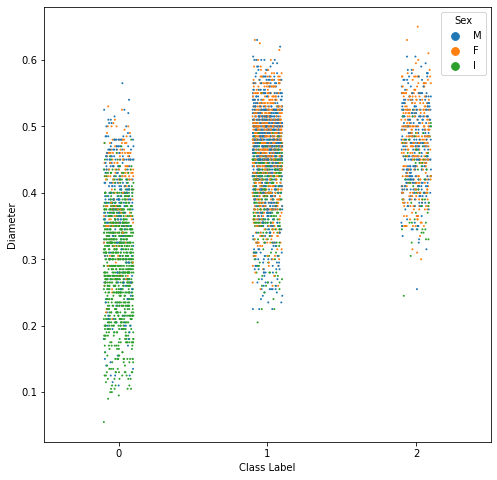

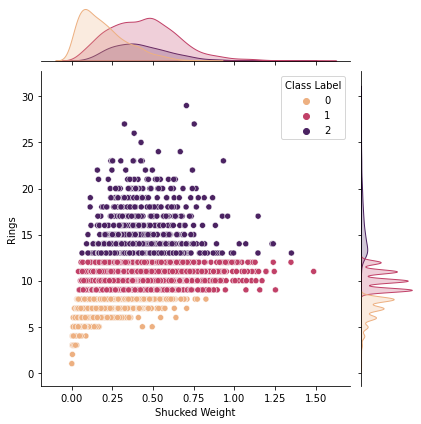

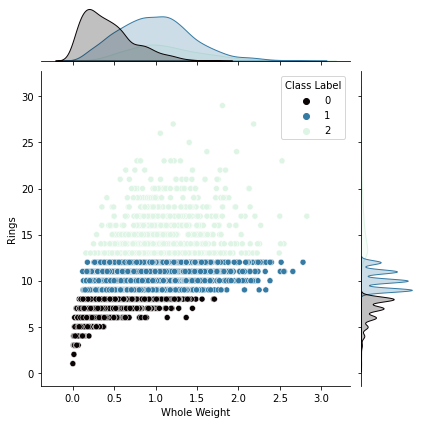

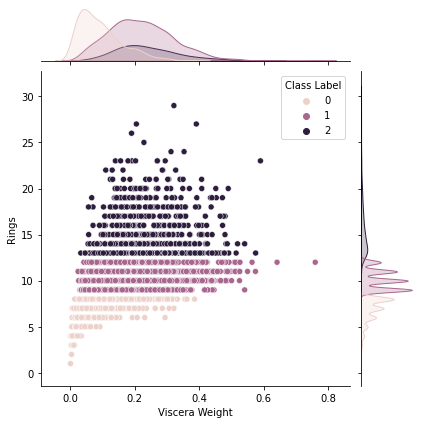

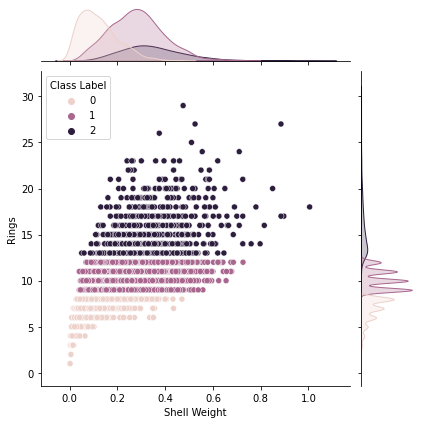

In [130]:
#Visualizing data using appropriate methods and plots can tell a lot wihtout even training a model. It can represent important aspects of the data which might not be known otherwise by simply observing the data in raw form
#Differenet types of Visualizations are employed to try to extract most information possible
# 0 corresponds to data of young abelone, 1 for intermediate and 2 for old

plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
ax = sns.countplot(x='Length',data = file, hue ='Class Label',dodge = True)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

#Although the count plot is only for a single feature against the count for each value, it illustrates key characteristics of the given data set
#The count plot shows unequal number of data points for each class i.e. no. of data points for intermediate > young > old. This is because counts for intermediate abalones are higher for most individual values of length.
#Looking at the plot, it can be said that Intermediate age group comprises of approximately half of the data points in the given dataset
#Another very significant piece of information we come across is that the range or spectrum of 'Length' for intermediate abalones completely overlap 'Length' values for old abelones. Morever, the values for intermediate also overlap more than half the lenght range of young abalones. 
#Thus we can presume that a given abelone would have a greater tendency to be classified as an Intermediate abalone given the 'Length' feature due to its broader range
    

sns.jointplot(x='Height', y='Rings', data=file, kind='kde', color='r', shade=True, thresh=0.05, hue='Class Label')

#KDE plot of Height against rings pan out similar information as the countplot of Length
#The height of every abalone lies within the range of 0-0.2mm. Additionally, intermediate abalones (represented by '1') cover most of the range in which the heights of the abalones lie.
#Intermediate abalone's height range is broader than old and completely overlaps it


plt.figure(figsize=(8,8))
sns.stripplot(x='Class Label', y='Diameter', data = file, hue='Sex', size=2)

#The strip plot of diameter of abalones against their class labels nicely demonstrates the distribution density of data points at specific values of diameter. 
#Moreover shows the entire range of values of diameter of each class
#Again diameter values of intermediate abalones completely overlap diameter values for old ones



sns.jointplot(x='Shucked Weight', y='Rings' , data = file, kind = 'scatter', hue='Class Label', palette = 'flare')
sns.jointplot(x='Whole Weight', y='Rings' , data = file, kind = 'scatter', hue='Class Label', palette = 'mako')
sns.jointplot(x='Viscera Weight', y = 'Rings', data = file, hue = 'Class Label')
sns.jointplot(x='Shell Weight', y = 'Rings', data = file, hue = 'Class Label')

#Similar conclusion is drawn out from the remaining 4 weight features of abalones
#Feature values of Intermediate highly overlap feature values of other two classes

  


k-Nearest Neighbors

In [131]:
#splitting the data frame into features and class labels

features = file.iloc[:,1:8]
print(features)

labels = file.iloc[:,9]
print(labels)

      Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell Weight  
0           0.1500

In [132]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels) # splits 75%/25% by default

print(train_features.shape)
print(test_features.shape)

model = KNeighborsClassifier(n_neighbors=57)
model.fit(train_features,train_labels)

predicted_labels = model.predict(test_features)

print(confusion_matrix(test_labels, predicted_labels))
print(accuracy_score(test_labels,predicted_labels)*100)


(3132, 7)
(1045, 7)
[[258  92   1]
 [ 76 442  11]
 [  5 125  35]]
70.33492822966507


_______________________________

Neural Network

In [133]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

In [134]:
#splitting the data set into training, validation and test set
train_set = features.iloc[:3001] 
train_label = labels.iloc[:3001]
encoded_train_label = np_utils.to_categorical(train_label)

validate_set = features.iloc[3001:3500]
validate_label = labels.iloc[3001:3500]
encoded_validate_label = np_utils.to_categorical(validate_label)

test_set = features.iloc[3500:]
test_label = labels.iloc[3500:]
encoded_test_label = np_utils.to_categorical(test_label)


In [70]:


network = Sequential()
network.add(Dense(64, input_dim = 7, activation = 'relu'))
network.add(BatchNormalization())

network.add(Dense(32, activation = 'relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(3, activation = 'softmax'))

network.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
network.fit(train_set,encoded_train_label,batch_size=8,epochs=200,verbose=1,validation_data=(validate_set,encoded_validate_label))

_, accuracy = network.evaluate(test_set, encoded_test_label, verbose=1)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/200
376/376 [==============================] - 2s 3ms/step - loss: 0.9025 - accuracy: 0.6055 - val_loss: 0.8503 - val_accuracy: 0.5932
Epoch 2/200
376/376 [==============================] - 1s 3ms/step - loss: 0.7719 - accuracy: 0.6644 - val_loss: 0.7703 - val_accuracy: 0.6273
Epoch 3/200
376/376 [==============================] - 2s 5ms/step - loss: 0.7629 - accuracy: 0.6608 - val_loss: 0.8070 - val_accuracy: 0.5812
Epoch 4/200
376/376 [==============================] - 1s 3ms/step - loss: 0.7281 - accuracy: 0.6724 - val_loss: 0.9129 - val_accuracy: 0.6172
Epoch 5/200
376/376 [==============================] - 1s 2ms/step - loss: 0.7353 - accuracy: 0.6721 - val_loss: 0.9319 - val_accuracy: 0.5731
Epoch 6/200
376/376 [==============================] - 1s 3ms/step - loss: 0.7206 - accuracy: 0.6864 - val_loss: 0.8109 - val_accuracy: 0.6313
Epoch 7/200
376/376 [==============================] - 2s 5ms/step - loss: 0.7077 - accuracy: 0.6861 - val_loss: 0.8112 - val_accuracy: 0.6393

Epoch 58/200
376/376 [==============================] - 1s 4ms/step - loss: 0.6971 - accuracy: 0.6954 - val_loss: 0.7466 - val_accuracy: 0.6493
Epoch 59/200
376/376 [==============================] - 2s 6ms/step - loss: 0.6828 - accuracy: 0.7041 - val_loss: 0.7618 - val_accuracy: 0.6353
Epoch 60/200
376/376 [==============================] - 1s 3ms/step - loss: 0.6912 - accuracy: 0.7068 - val_loss: 0.7819 - val_accuracy: 0.6493
Epoch 61/200
376/376 [==============================] - 1s 2ms/step - loss: 0.6799 - accuracy: 0.7058 - val_loss: 0.9433 - val_accuracy: 0.6172
Epoch 62/200
376/376 [==============================] - 1s 4ms/step - loss: 0.6875 - accuracy: 0.6971 - val_loss: 0.7447 - val_accuracy: 0.6513
Epoch 63/200
376/376 [==============================] - 1s 3ms/step - loss: 0.6850 - accuracy: 0.7084 - val_loss: 0.7391 - val_accuracy: 0.6413
Epoch 64/200
376/376 [==============================] - 1s 2ms/step - loss: 0.6814 - accuracy: 0.7021 - val_loss: 0.8739 - val_accuracy:

Epoch 115/200
376/376 [==============================] - 1s 4ms/step - loss: 0.6768 - accuracy: 0.7114 - val_loss: 0.7398 - val_accuracy: 0.6533
Epoch 116/200
376/376 [==============================] - 1s 3ms/step - loss: 0.6788 - accuracy: 0.7081 - val_loss: 0.7969 - val_accuracy: 0.6353
Epoch 117/200
376/376 [==============================] - 1s 3ms/step - loss: 0.6754 - accuracy: 0.7094 - val_loss: 0.7739 - val_accuracy: 0.6413
Epoch 118/200
376/376 [==============================] - 1s 4ms/step - loss: 0.6820 - accuracy: 0.7071 - val_loss: 0.7555 - val_accuracy: 0.6413
Epoch 119/200
376/376 [==============================] - 1s 4ms/step - loss: 0.6783 - accuracy: 0.7034 - val_loss: 0.7656 - val_accuracy: 0.6473
Epoch 120/200
376/376 [==============================] - 2s 6ms/step - loss: 0.6791 - accuracy: 0.7098 - val_loss: 0.7511 - val_accuracy: 0.6293
Epoch 121/200
376/376 [==============================] - 1s 4ms/step - loss: 0.6760 - accuracy: 0.7208 - val_loss: 0.7281 - val_ac

376/376 [==============================] - 1s 3ms/step - loss: 0.6624 - accuracy: 0.7114 - val_loss: 0.7433 - val_accuracy: 0.6313
Epoch 172/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6659 - accuracy: 0.7034 - val_loss: 0.7695 - val_accuracy: 0.6533
Epoch 173/200
376/376 [==============================] - 2s 6ms/step - loss: 0.6739 - accuracy: 0.7104 - val_loss: 0.7383 - val_accuracy: 0.6533
Epoch 174/200
376/376 [==============================] - 2s 6ms/step - loss: 0.6655 - accuracy: 0.7091 - val_loss: 0.7830 - val_accuracy: 0.6353
Epoch 175/200
376/376 [==============================] - 2s 6ms/step - loss: 0.6631 - accuracy: 0.7191 - val_loss: 0.7491 - val_accuracy: 0.6353
Epoch 176/200
376/376 [==============================] - 2s 6ms/step - loss: 0.6756 - accuracy: 0.7044 - val_loss: 0.7496 - val_accuracy: 0.6353
Epoch 177/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6853 - accuracy: 0.7111 - val_loss: 0.7627 - val_accuracy: 0.6373

_______________________________________

CNN using DeepInsight Image transformation

In [82]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

C:\Users\Naba\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
C:\Users\Naba\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


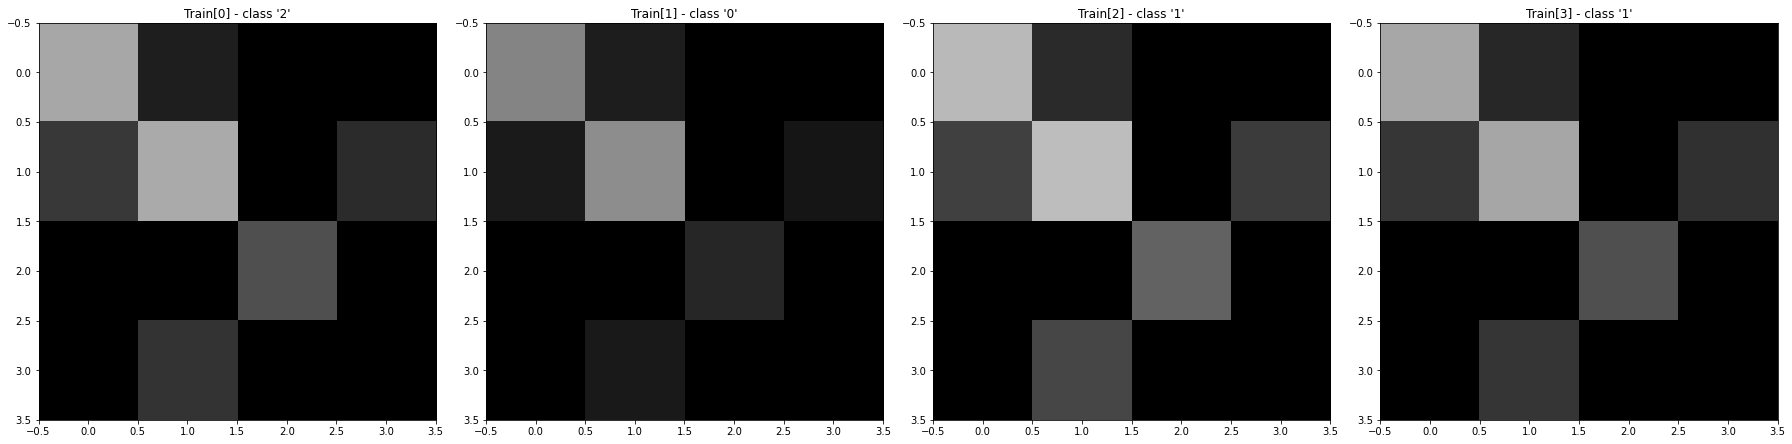

In [115]:
#we already have the data set split and converted to categorical labels
#employing the deepinsight methodology, the data needs to be scaled between 0 and 1 which is done in the following lines of code

ln = LogScaler()
train_set_norm = ln.fit_transform(train_set)
validate_set_norm = ln.transform(validate_set)
test_set_norm = ln.transform(test_set)

#initilizing the function that will find and fit the location of each feature to a pixel frame
it = ImageTransformer(feature_extractor='tsne', pixels=4, random_state=1701, n_jobs=-1)

#fitting and transforming all the data samples to the pixel frame
f = it.fit(X_train_norm, plot=False)
train_set_img = it.fit_transform(train_set_norm)

fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(train_set_img[i])
    ax[i].title.set_text("Train[{}] - class '{}'".format(i, train_label[i]))
plt.tight_layout()

validate_set_img = it.transform(validate_set_norm)
test_set_img = it.transform(test_set_norm)


In [116]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)


In [123]:
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten, Conv2D, MaxPooling2D


cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(4,4,3), padding='same'))
cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(3, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn.fit(train_set_img,encoded_train_label,batch_size=8,epochs=200,verbose=1,validation_data=(validate_set_img,encoded_validate_label))

_, accuracy = cnn.evaluate(test_set_img, encoded_test_label, verbose=1)
print('Accuracy: %.2f' % (accuracy*100))





Epoch 1/200
376/376 [==============================] - 4s 6ms/step - loss: 0.8602 - accuracy: 0.6061 - val_loss: 0.8469 - val_accuracy: 0.5671
Epoch 2/200
376/376 [==============================] - 2s 5ms/step - loss: 0.7798 - accuracy: 0.6504 - val_loss: 0.8051 - val_accuracy: 0.5792
Epoch 3/200
376/376 [==============================] - 2s 5ms/step - loss: 0.7132 - accuracy: 0.6864 - val_loss: 0.8021 - val_accuracy: 0.6112
Epoch 4/200
376/376 [==============================] - 2s 4ms/step - loss: 0.7056 - accuracy: 0.6911 - val_loss: 0.8165 - val_accuracy: 0.5952
Epoch 5/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6913 - accuracy: 0.6918 - val_loss: 0.7554 - val_accuracy: 0.6393
Epoch 6/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6922 - accuracy: 0.7031 - val_loss: 0.7779 - val_accuracy: 0.6273
Epoch 7/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6787 - accuracy: 0.7031 - val_loss: 0.7457 - val_accuracy: 0.6433

Epoch 58/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6291 - accuracy: 0.7184 - val_loss: 0.7613 - val_accuracy: 0.6493
Epoch 59/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6417 - accuracy: 0.7161 - val_loss: 0.7564 - val_accuracy: 0.6473
Epoch 60/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6298 - accuracy: 0.7281 - val_loss: 0.7843 - val_accuracy: 0.6413
Epoch 61/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6338 - accuracy: 0.7241 - val_loss: 0.7917 - val_accuracy: 0.6353
Epoch 62/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6320 - accuracy: 0.7154 - val_loss: 0.7398 - val_accuracy: 0.6533
Epoch 63/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6312 - accuracy: 0.7144 - val_loss: 0.8117 - val_accuracy: 0.6212
Epoch 64/200
376/376 [==============================] - 1s 4ms/step - loss: 0.6343 - accuracy: 0.7154 - val_loss: 0.7804 - val_accuracy:

Epoch 115/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6234 - accuracy: 0.7211 - val_loss: 0.7445 - val_accuracy: 0.6373
Epoch 116/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6223 - accuracy: 0.7214 - val_loss: 0.7736 - val_accuracy: 0.6493
Epoch 117/200
376/376 [==============================] - 1s 3ms/step - loss: 0.6199 - accuracy: 0.7261 - val_loss: 0.7517 - val_accuracy: 0.6533
Epoch 118/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6278 - accuracy: 0.7201 - val_loss: 0.7698 - val_accuracy: 0.6433
Epoch 119/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6139 - accuracy: 0.7298 - val_loss: 0.8075 - val_accuracy: 0.6333
Epoch 120/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6188 - accuracy: 0.7251 - val_loss: 0.7490 - val_accuracy: 0.6493
Epoch 121/200
376/376 [==============================] - 2s 7ms/step - loss: 0.6225 - accuracy: 0.7251 - val_loss: 0.7725 - val_ac

376/376 [==============================] - 2s 5ms/step - loss: 0.6059 - accuracy: 0.7284 - val_loss: 0.7700 - val_accuracy: 0.6453
Epoch 172/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6027 - accuracy: 0.7351 - val_loss: 0.7458 - val_accuracy: 0.6493
Epoch 173/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6157 - accuracy: 0.7328 - val_loss: 0.7527 - val_accuracy: 0.6413
Epoch 174/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6023 - accuracy: 0.7301 - val_loss: 0.7911 - val_accuracy: 0.6453
Epoch 175/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6057 - accuracy: 0.7271 - val_loss: 0.7602 - val_accuracy: 0.6473
Epoch 176/200
376/376 [==============================] - 2s 5ms/step - loss: 0.6125 - accuracy: 0.7304 - val_loss: 0.8146 - val_accuracy: 0.6172
Epoch 177/200
376/376 [==============================] - 2s 4ms/step - loss: 0.6026 - accuracy: 0.7284 - val_loss: 0.7418 - val_accuracy: 0.6513